In this norebook I will deal with outliers from the numeric variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
X_train = pd.read_csv('X_train_1.csv', index_col=[0])
X_test = pd.read_csv('X_test_1.csv', index_col=[0])

In [3]:
numeric_vars = X_train.select_dtypes('int', 'float').columns
numeric_vars

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

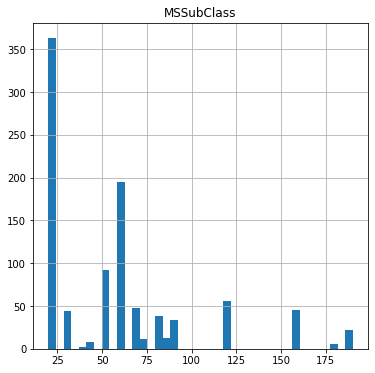

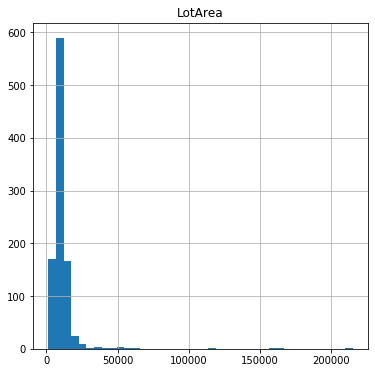

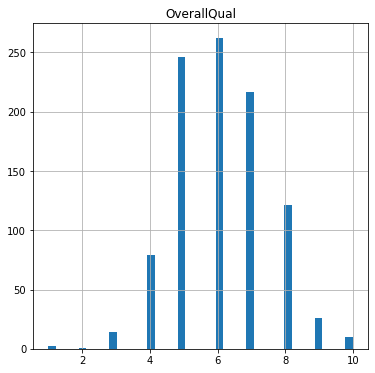

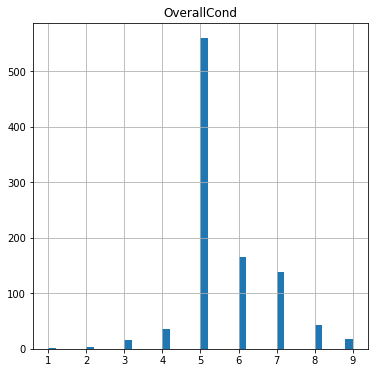

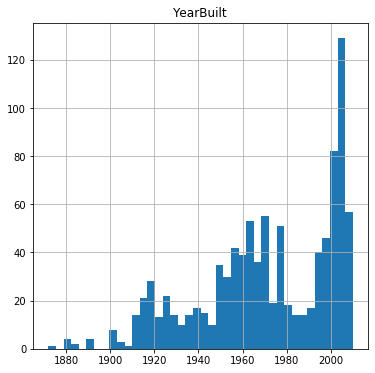

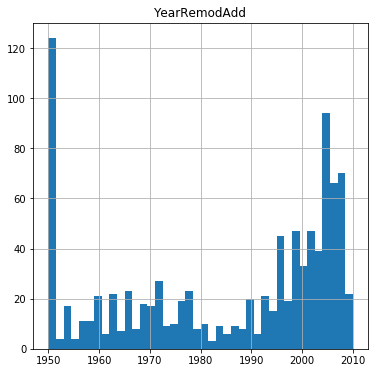

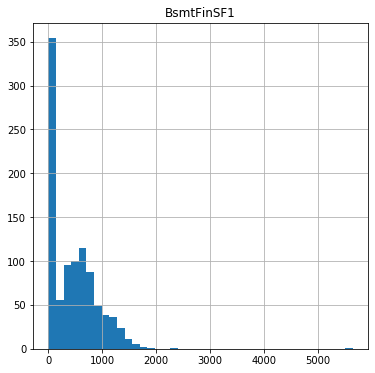

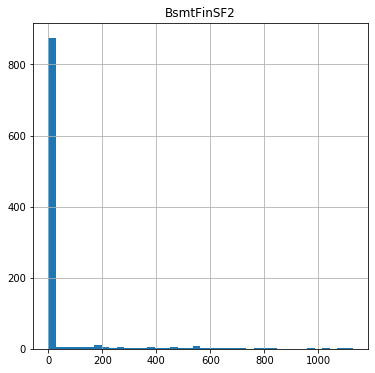

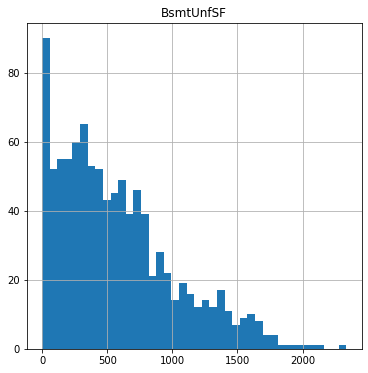

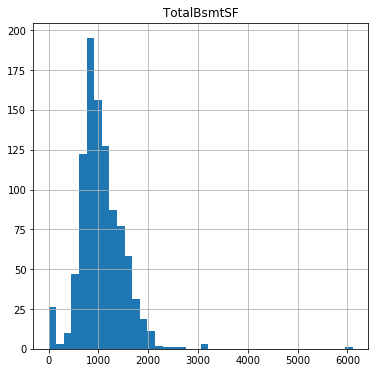

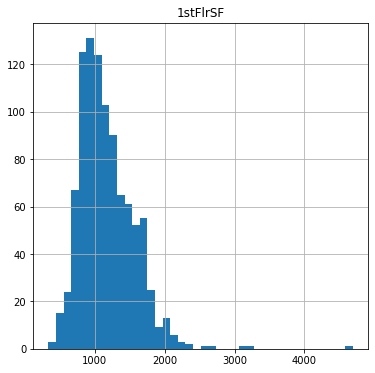

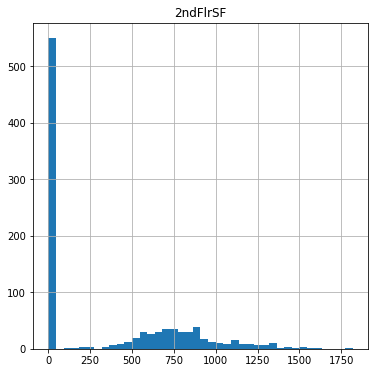

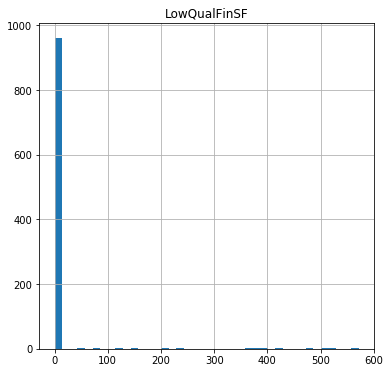

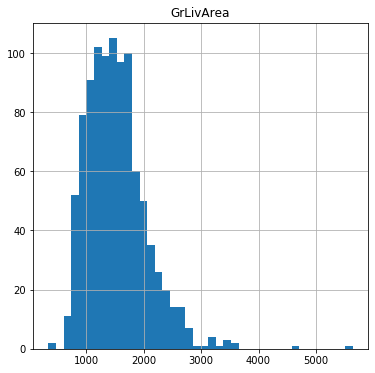

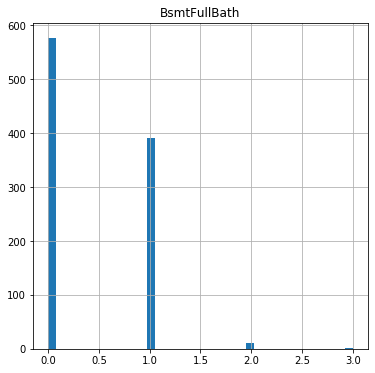

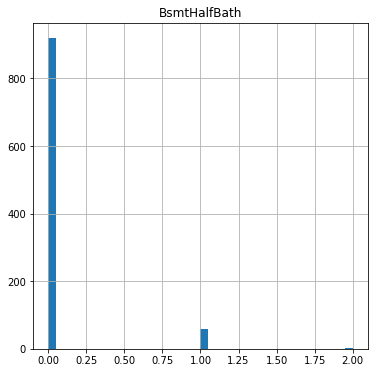

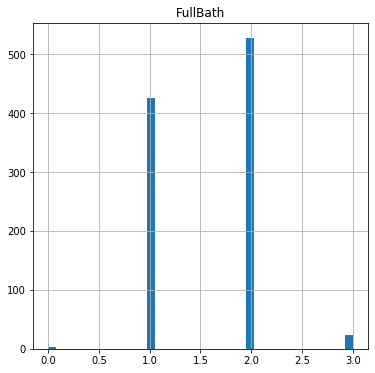

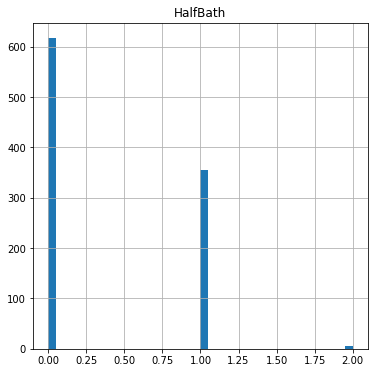

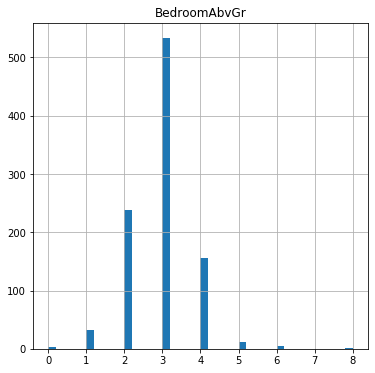

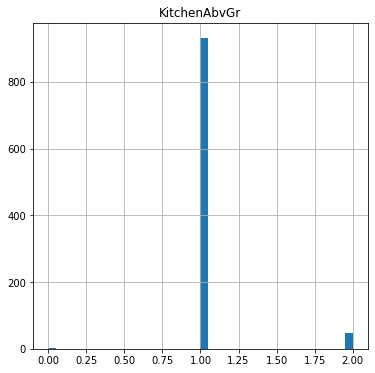

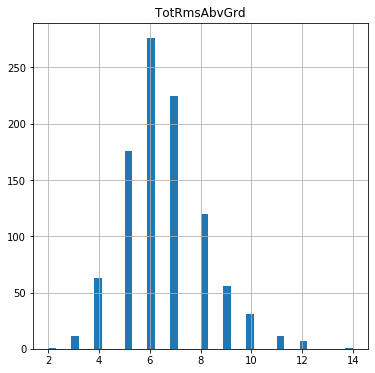

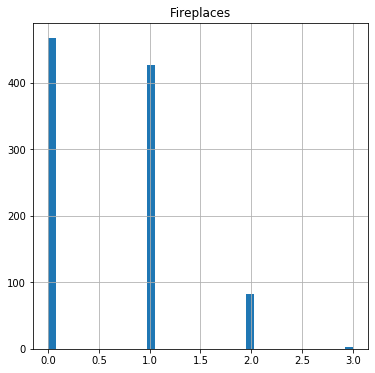

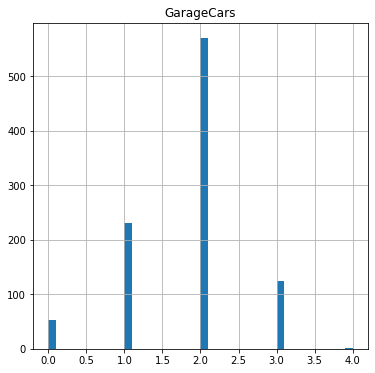

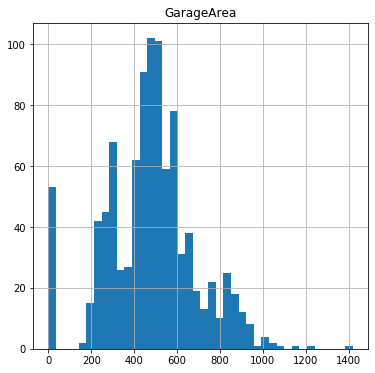

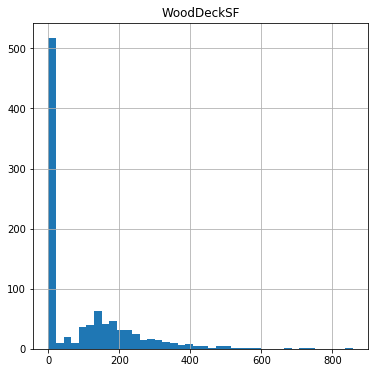

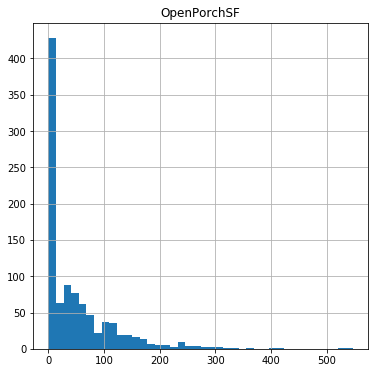

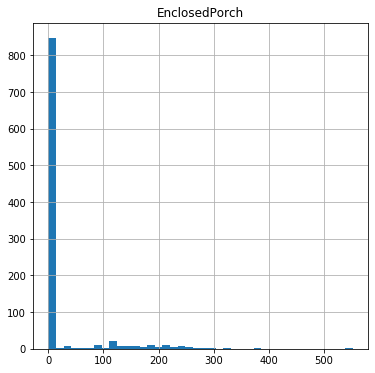

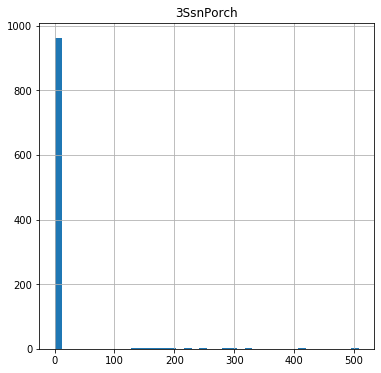

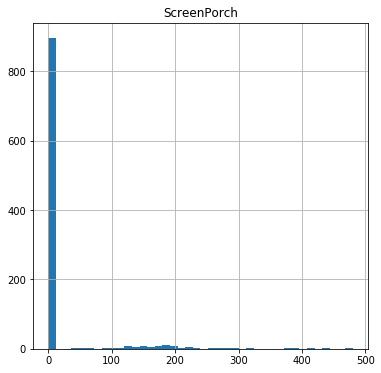

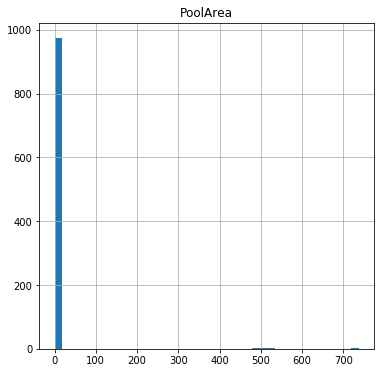

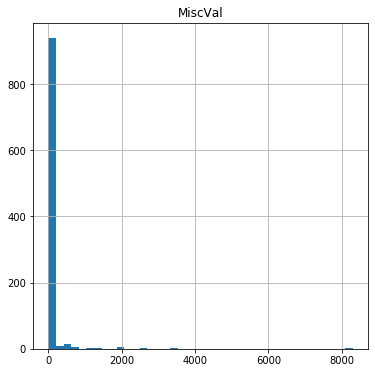

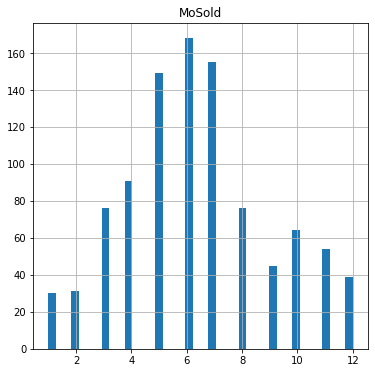

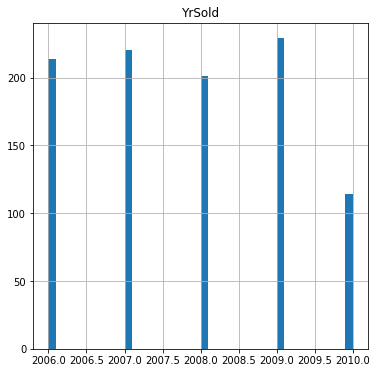

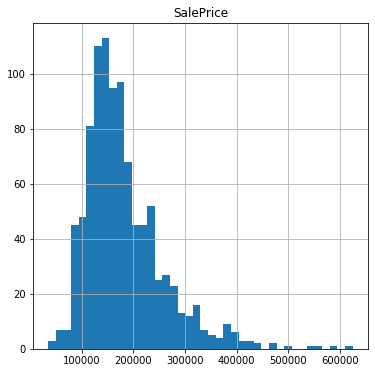

In [4]:
#will look at each variables to visually determine those that have outliers

def figure(variable):
    plt.figure(figsize=(6,6))
    X_train[variable].hist(bins=40)
    plt.title(variable)
    
    plt.show()
    
for var in numeric_vars:
    figure(var)

A few continuous variables come to attention:
 - LotArea
 - YearBuilt
 - BSmtFinSF1
 - BsmtFinSF2
 - BsmtUnfSF
 - TotalBsmtSF
 - 1stFlrSF
 - 2ndFlrSF
 - LowQualFinSF
 - GrLivArea
 - GarageArea
 - WoodDeckSF
 - OpenPorchSF
 - EnclosedPorch
 - 3SsnPorch
 - ScreenPorch
 - MiscVal
 
Will focus on these variables to deal with the outliers.

In [5]:
#first, put these variables into a list in case need to use them.
cont_var = ['LotArea', 'YearBuilt' , 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF' , 'TotalBsmtSF'
, '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

In [6]:
#since none of the variables in the list we want to tackle seem normally distributed, I will use
#the quantile method to cap the outliers 

def capp_skewed_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    #cap with the boundary
    df[variable] = np.where(df[variable]>upper_boundary,upper_boundary,
                           np.where(df[variable]<lower_boundary,lower_boundary,df[variable]))

In [7]:
#apply the function on all variables in the pre-defined list
for col in cont_var:
    capp_skewed_boundaries(X_train,col,1.5)

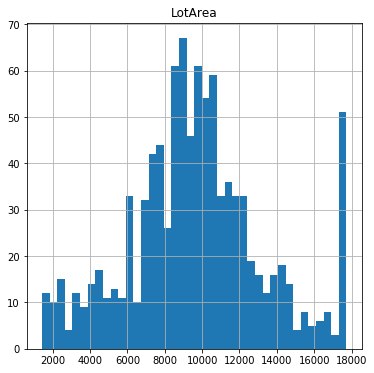

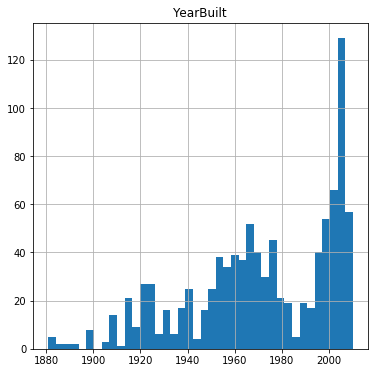

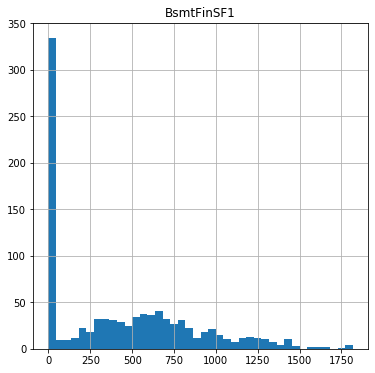

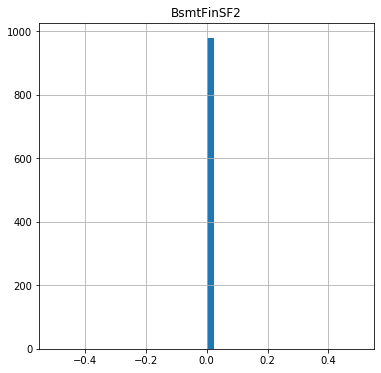

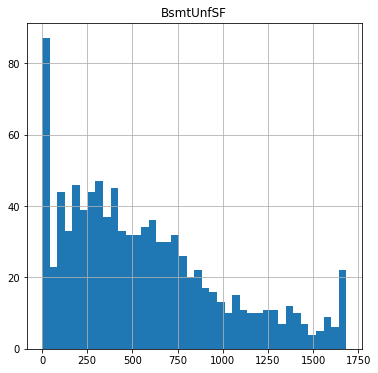

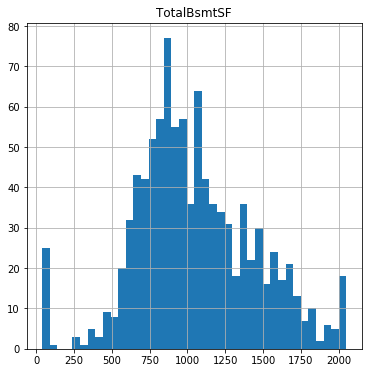

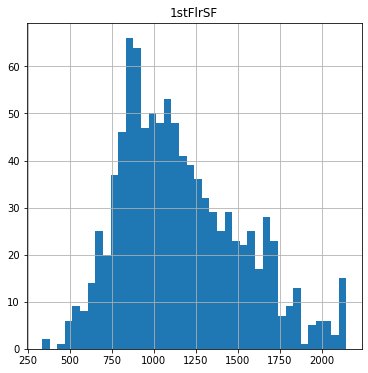

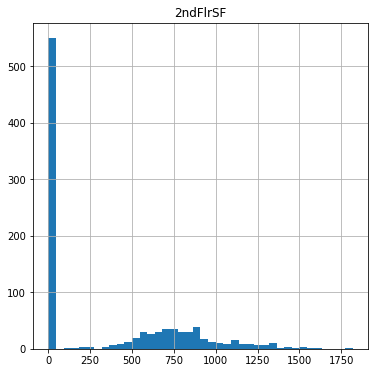

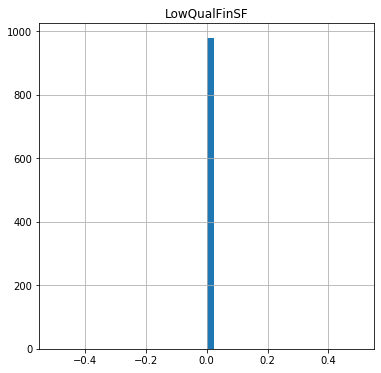

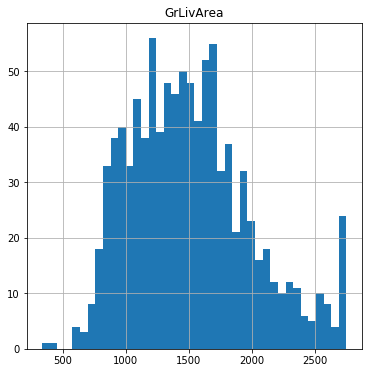

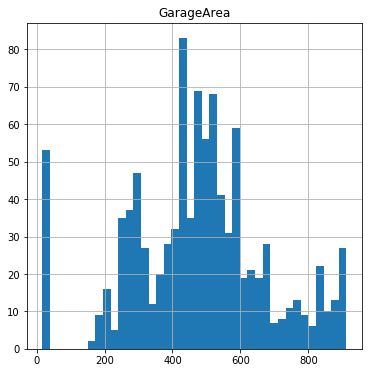

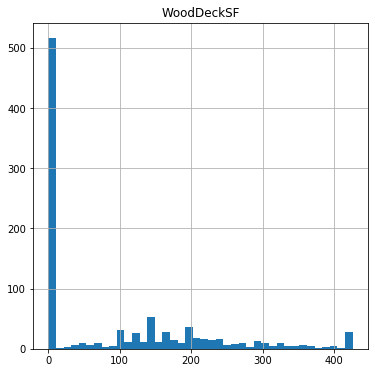

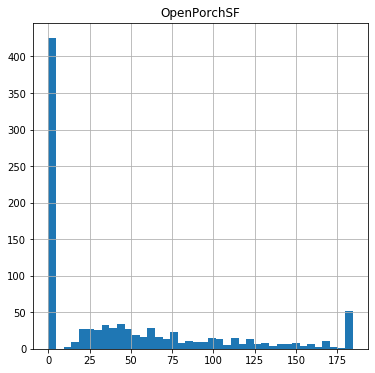

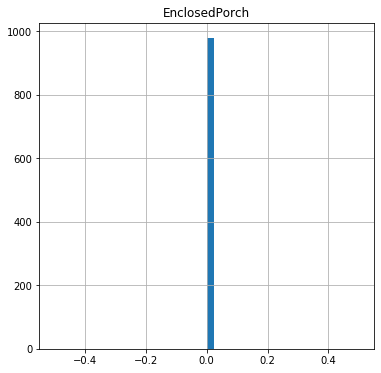

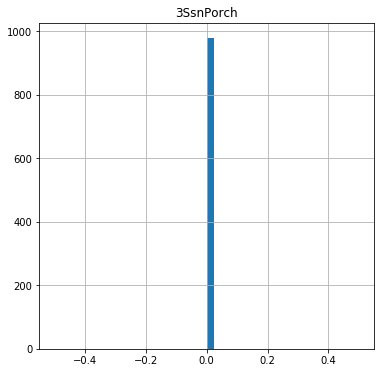

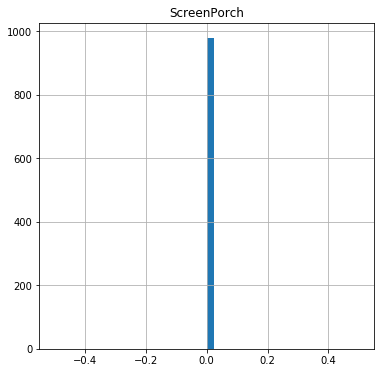

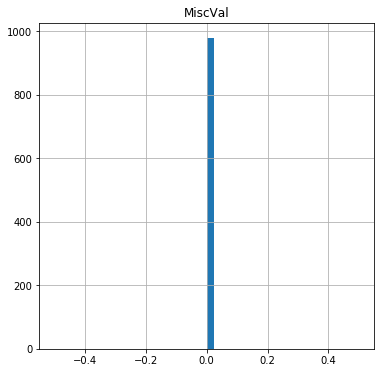

In [8]:
#plot the variables to visually evaluate the change
for var in cont_var:
    figure(var)
    
#capping st 1.5 seems to have made some variables to hover around one value.
#will increase the distance to 3.

In [9]:
#reimport the dataset so that the profram doesnt run the function only on already capped vars
X_train = pd.read_csv('X_train_1.csv', index_col=[0])
X_test = pd.read_csv('X_test_1.csv', index_col=[0])

for col in cont_var:
    capp_skewed_boundaries(X_train,col,3)

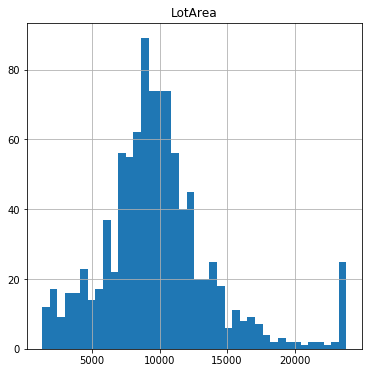

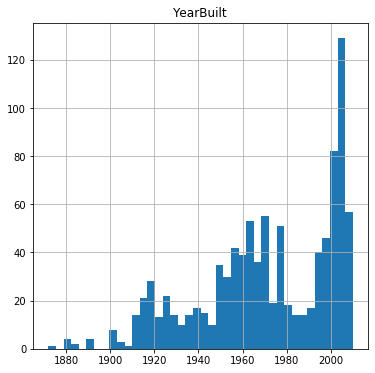

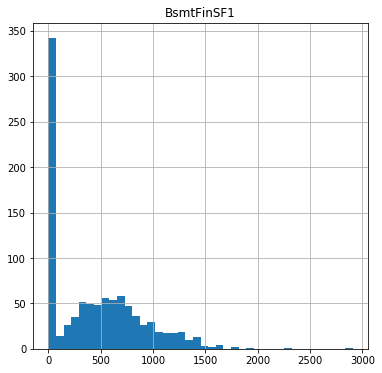

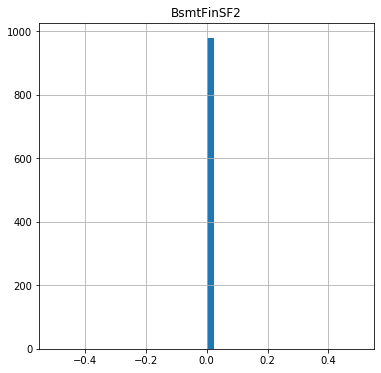

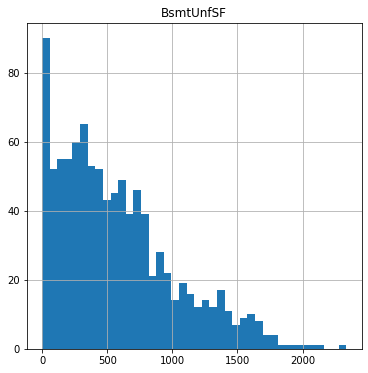

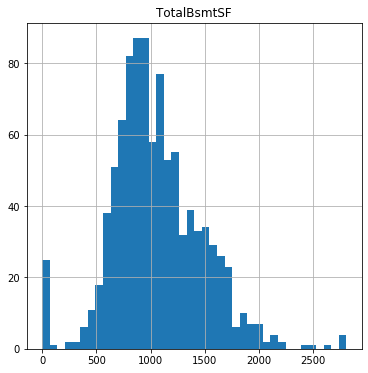

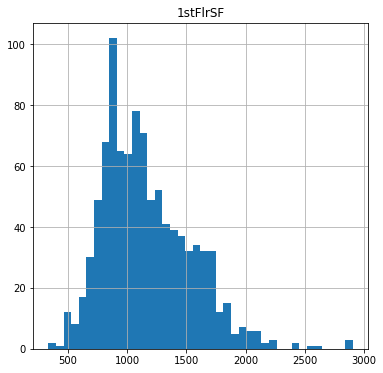

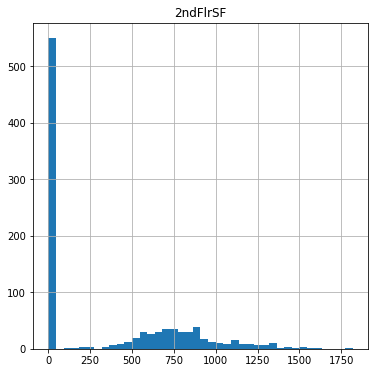

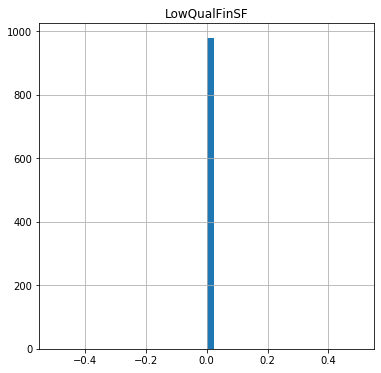

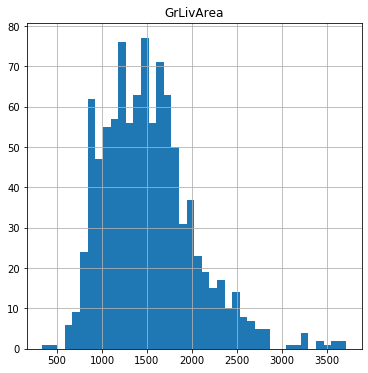

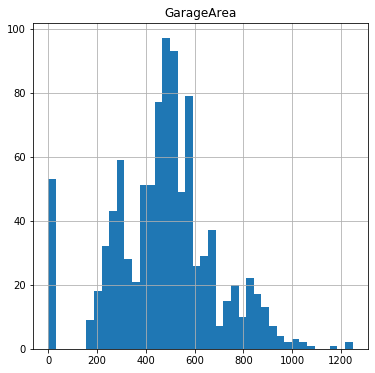

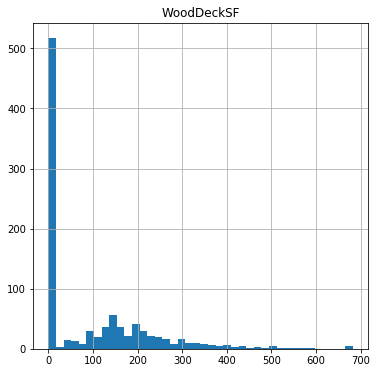

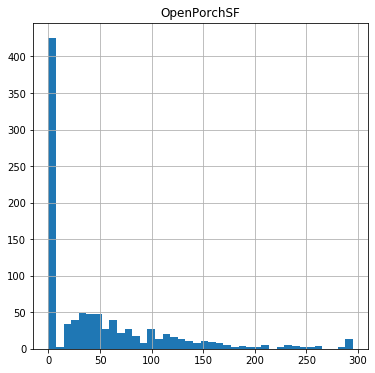

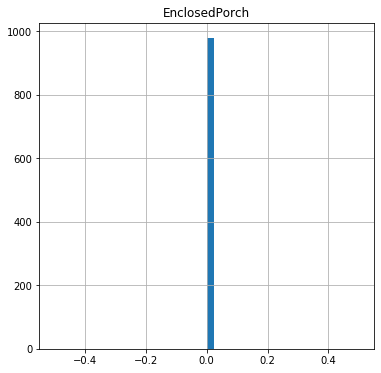

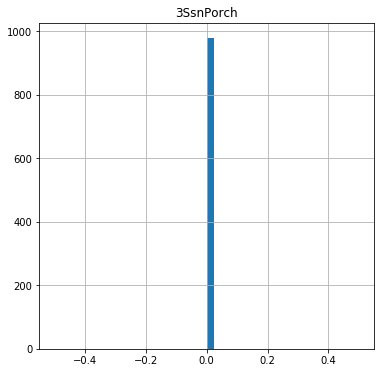

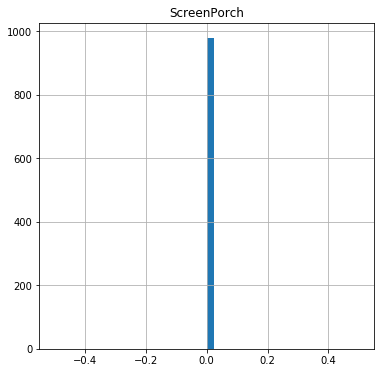

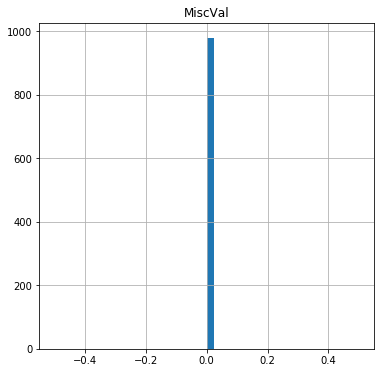

In [10]:
for var in cont_var:
    figure(var)
#since there are some variables that result in being capped to one value, I will exclude them from 
#the list of outlier management and keep them as they are for now. For others, will cap outliers
#at a distance of 3, because we do not want to loose important outlier information.

In [11]:
# again, reimport the dataset so that the profram doesnt run the function only on already capped vars
X_train = pd.read_csv('X_train_1.csv', index_col=[0])
X_test = pd.read_csv('X_test_1.csv', index_col=[0])


#remove a few variables from the continuous variables list into a new list
new_cont_vars = ['LotArea', 'YearBuilt' , 'BsmtFinSF1', 'BsmtUnfSF' , 'TotalBsmtSF'
, '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

In [12]:
for col in new_cont_vars:
    capp_skewed_boundaries(X_train,col,3)

In [13]:
#do the same as above for the test set too
for col in new_cont_vars:
    capp_skewed_boundaries(X_test,col,3)

In [14]:
#save the X_train and the X_test
X_train.to_csv('X_train_2.csv')
X_test.to_csv('X_test_2.csv')